# Comparing Custom KernelizedSVC vs Sklearn KernelizedSVC

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ml_lib import KernelizedSVC
from utils.helpers import (evaluate_metrics, train_time, cross_validate, 
                           plot_confusion_matrix, plot_decision_boundary)

## 1. Dataset Generation

In [3]:
# Synthetic dataset for visual decision boundary evaluation
X_vis, y_vis = make_moons(n_samples=300, noise=0.1, random_state=42)

scaler_blobs = StandardScaler()
X_vis = scaler_blobs.fit_transform(X_vis)

# Real-world medical dataset (binary classification)
X_bc, y_bc = load_breast_cancer(return_X_y=True)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)


## 2. Model Training 

In [4]:
csvc = KernelizedSVC(C=1, kernel='rbf')
svc = SVC(C=1, kernel='rbf')

csvc.fit(X_train_bc, y_train_bc)
svc.fit(X_train_bc, y_train_bc)

train_time(csvc, X_train_bc, y_train_bc)
train_time(svc, X_train_bc, y_train_bc)

Model trained in 0.1003 seconds.
Model trained in 0.0045 seconds.


0.0045

## 3. Predictions & Evaluation

### 3.1. Accuracy, precision, recall, F1

In [5]:
y_pred_csvc = csvc.predict(X_test_bc)
y_pred_svc = svc.predict(X_test_bc)

display(evaluate_metrics(y_test_bc, y_pred_csvc, title="Custom KernelizedSVC"))
display(evaluate_metrics(y_test_bc, y_pred_svc, title="Sklearn KernelizedSVC"))

,Model,Accuracy,Precision,Recall,F1
0,Custom KernelizedSVC,0.982456,0.972603,1.0,0.986111


,Model,Accuracy,Precision,Recall,F1
0,Sklearn KernelizedSVC,0.982456,0.972603,1.0,0.986111


### 3.2. Confusion Matrix

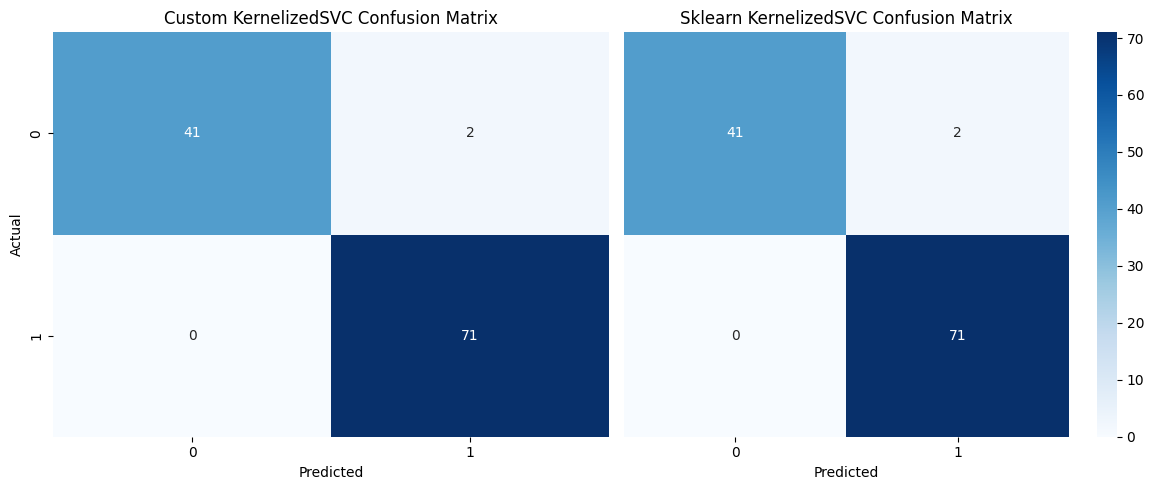

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

plot_confusion_matrix(y_test_bc, y_pred_csvc, ax=ax1, title="Custom KernelizedSVC Confusion Matrix", cbar=False)
plot_confusion_matrix(y_test_bc, y_pred_svc, ax=ax2, title="Sklearn KernelizedSVC Confusion Matrix", yvisible=False) 

plt.tight_layout()
plt.show()

### 3.3. Decision Boundary

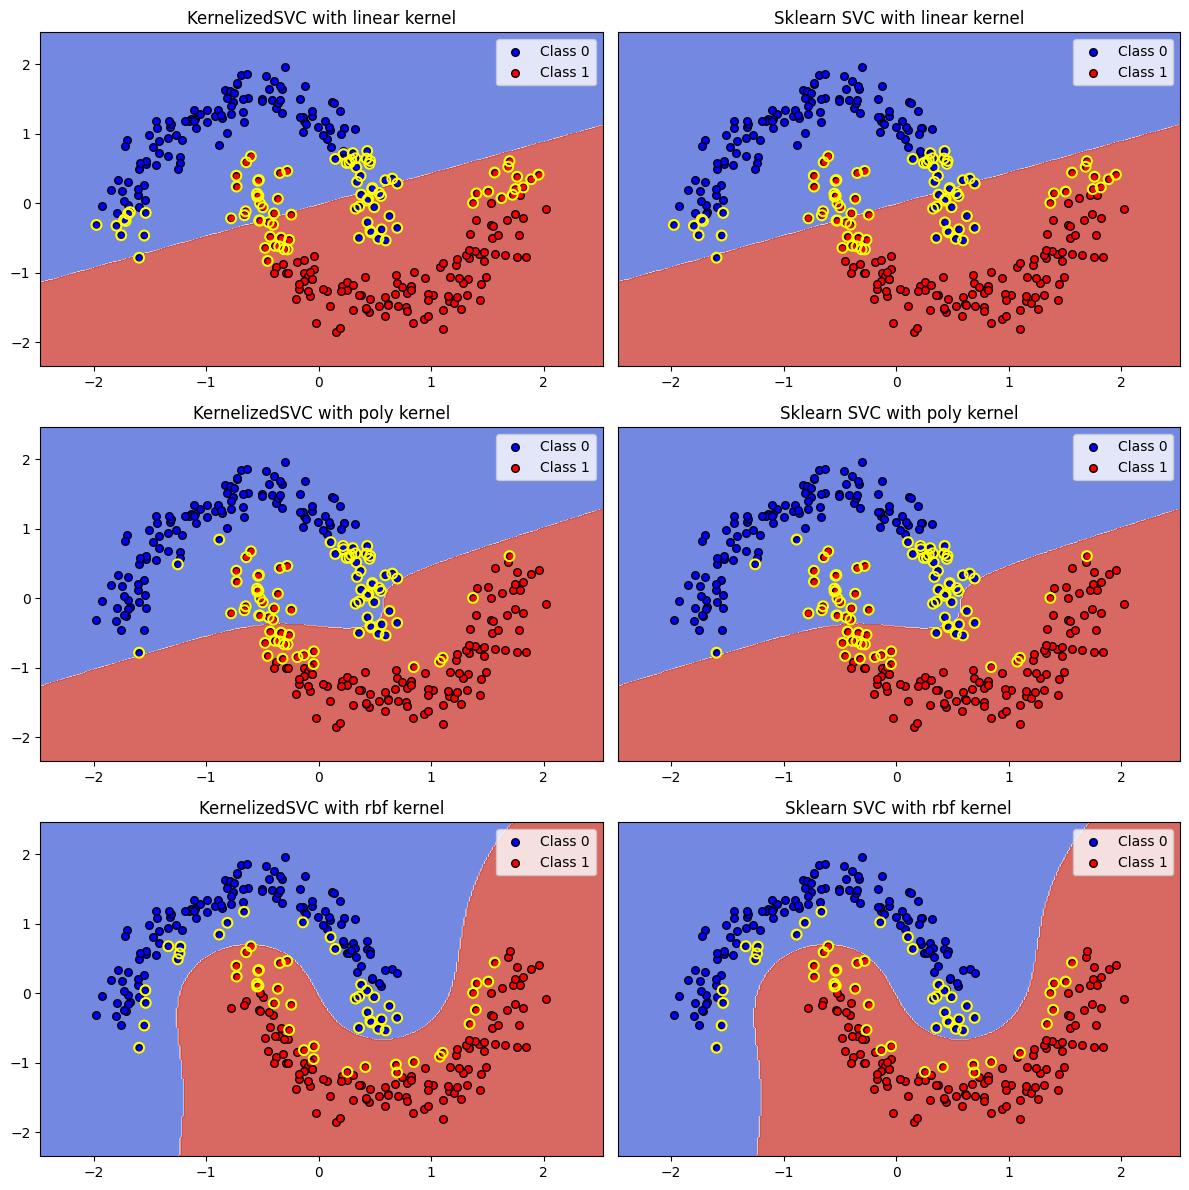

In [7]:
kernels = ['linear', 'poly', 'rbf']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for row_axes, kernel in zip(axes, kernels):
    csvc = KernelizedSVC(kernel=kernel, C=1)
    svc = SVC(kernel=kernel)

    csvc.fit(X_vis, y_vis)
    svc.fit(X_vis, y_vis)

    support_vectors_c = X_vis[csvc._support_indices_vis] 
    support_vectors_s = svc.support_vectors_

    y_pred_csvc = csvc.predict(X_vis)
    y_pred_svc = svc.predict(X_vis)

    plot_decision_boundary(csvc, X_vis, y_vis, row_axes[0], f'KernelizedSVC with {kernel} kernel')
    plot_decision_boundary(svc, X_vis, y_vis, row_axes[1], f'Sklearn SVC with {kernel} kernel', yvisible=False)

    row_axes[0].scatter(*support_vectors_c.T,
                        facecolors='none',
                        edgecolors='yellow',
                        linewidths=1.5,
                        s=50)
    row_axes[1].scatter(*support_vectors_s.T,
                        facecolors='none',
                        edgecolors='yellow',
                        linewidths=1.5,
                        s=50)


plt.tight_layout()

## 4. Cross-Validation

In [8]:
print("Custom KernelizedSVC Cross-Validation Scores")
display(cross_validate(KernelizedSVC, X_bc, y_bc, cv=5, verbose=False))
print("Sklearn KernelizedSVC Cross-Validation Scores")
display(cross_validate(SVC, X_bc, y_bc, cv=5, verbose=False))

Custom KernelizedSVC Cross-Validation Scores


,accuracy,precision,recall,f1
0,0.980655,0.977616,0.991988,0.984617


Sklearn KernelizedSVC Cross-Validation Scores


,accuracy,precision,recall,f1
0,0.980655,0.977616,0.991988,0.984617
